<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Ali Yousefi

**Student ID**:99109111





In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [ ]:


# Load the dataset
data = pd.read_csv('Logistic_question.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        output = torch.sigmoid(self.linear(x))
        return output

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = LogisticRegression(X.shape[1], 1).to(device)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000

for epoch in range(num_epochs):
    # Convert the input data to PyTorch tensors and move them to the GPU
    inputs = torch.from_numpy(X).float().to(device)
    labels = torch.from_numpy(y.reshape(-1, 1)).float().to(device)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Compute the accuracy on the training set
with torch.no_grad():
    train_preds = (model(torch.from_numpy(X).float().to(device)) > 0.5).cpu().numpy().squeeze()
    train_accuracy = np.mean(train_preds == y)

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [ ]:


# Load the dataset
data = pd.read_csv('Logistic_question.csv')

# Convert the target column to binary
data['Target'] = (data['Target'] > np.mean(data['Target'].values)).astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1].values, data['Target'].values, test_size=0.2, random_state=42)

# Normalize the data using the training set
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Define the Logistic Regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        output = torch.sigmoid(self.linear(x))
        return output

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = LogisticRegression(X_train.shape[1], 1).to(device)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000

for epoch in range(num_epochs):
    # Convert the input data to PyTorch tensors and move them to the GPU
    inputs = torch.from_numpy(X_train_norm).float().to(device)
    labels = torch.from_numpy(y_train.reshape(-1, 1)).float().to(device)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    test_preds = (model(torch.from_numpy(X_test_norm).float().to(device)) > 0.5).cpu().numpy().squeeze()

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1-score: {f1:.4f}')

Epoch [100/1000], Loss: 0.4647
Epoch [200/1000], Loss: 0.3919
Epoch [300/1000], Loss: 0.3650
Epoch [400/1000], Loss: 0.3516
Epoch [500/1000], Loss: 0.3438
Epoch [600/1000], Loss: 0.3388
Epoch [700/1000], Loss: 0.3354
Epoch [800/1000], Loss: 0.3329
Epoch [900/1000], Loss: 0.3310
Epoch [1000/1000], Loss: 0.3294
Test Accuracy: 0.9625
Test Precision: 0.9500
Test Recall: 0.9744
Test F1-score: 0.9620


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**
The key evaluation metrics used in the code are:

1. **Accuracy**: Accuracy is the overall correctness of the model's predictions, calculated as (TP + TN) / (TP + TN + FP + FN). Accuracy is a good general metric, but it can be misleading when dealing with imbalanced datasets, as it doesn't differentiate between different types of errors.

2. **Precision**: Precision measures the model's ability to correctly predict the positive class, calculated as TP / (TP + FP). Precision is useful when the cost of false positives is high, such as in tasks where you want to minimize the number of false alarms.

3. **Recall (Sensitivity/True Positive Rate)**: Recall quantifies the model's ability to correctly identify the positive class instances, calculated as TP / (TP + FN). Recall is important when the cost of false negatives is high, such as in medical diagnosis tasks where you want to minimize the number of missed positive cases.

4. **F1-score**: The F1-score is the harmonic mean of precision and recall, calculated as 2 * (Precision * Recall) / (Precision + Recall). The F1-score provides a balanced measure of the model's performance, especially when dealing with imbalanced datasets.

Here's how these metrics can be useful in specific tasks:

- **Accuracy**: Accuracy is a good general metric, but it may not be the best choice when dealing with imbalanced datasets, as it can be skewed by the majority class. In such cases, precision, recall, and F1-score may be more informative.

- **Precision**: Precision is important in tasks where the cost of false positives is high, such as in fraud detection or spam filtering, where you want to minimize the number of false alarms.

- **Recall**: Recall is crucial in tasks where the cost of false negatives is high, such as in medical diagnosis or credit risk assessment, where you want to minimize the number of missed positive cases.

- **F1-score**: The F1-score is a good choice when you need a balanced measure of the model's performance, especially when dealing with imbalanced datasets. It can be particularly useful in tasks where both precision and recall are important, such as in information retrieval or natural language processing.


**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('Logistic_question.csv')

# Convert the target column to binary
data['Target'] = (data['Target'] > np.mean(data['Target'].values)).astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1].values, data['Target'].values, test_size=0.2, random_state=42)

# Normalize the data using the training set
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_norm, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_norm)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1-score: {f1:.4f}')


Test Accuracy: 0.9625
Test Precision: 0.9737
Test Recall: 0.9487
Test F1-score: 0.9610


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?



**Your answer:**

### Parameters of the Built-in Logistic Regression Function:
1. **Penalty**: This parameter specifies the norm used in the penalization. It can be set to L1 or L2 regularization.
   
2. **C**: The regularization strength parameter. A lower value of C indicates stronger regularization, which helps prevent overfitting.

3. **Solver**: The optimization algorithm used to fit the model. Common solvers include 'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga'.

4. **Max_iter**: The maximum number of iterations taken for the solvers to converge.

5. **Multi_class**: Determines how the model handles multi-class classification problems. It can be set to 'ovr' (one-vs-rest) or 'multinomial' (softmax).

### Impact on Model's Performance:
1. **Regularization**: The choice of regularization (L1 or L2) and the regularization strength (C) help control overfitting. Regularization can improve the model's generalization to unseen data.

2. **Solver**: The selection of the solver affects the optimization process. Some solvers are more suitable for large datasets or specific types of problems, impacting the model's training speed and accuracy.

3. **Convergence**: The maximum number of iterations (Max_iter) influences how long the model trains. Setting an appropriate value ensures convergence without unnecessary computational burden.

4. **Multi-class Handling**: For multi-class problems, the 'multi_class' parameter determines how the model handles multiple classes. Choosing the right strategy can improve the model's performance in multi-class classification tasks.

### Comparison with Custom Function:
- The built-in function's optimized implementation and parameter tuning capabilities can lead to faster convergence and better performance compared to a custom function.
- The built-in function's ability to handle various parameters and regularization techniques allows for more flexibility and adaptability to different datasets and problem types.
- in this case as we can see all of our 4 accuracy is better than buit in function

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('Logistic_question.csv')

# Quantize the target column into different numbers of levels
for num_levels in range(2, 11):
    print(f"Testing with {num_levels} levels:")

    # Quantize the target column
    data['Target_quantized'] = pd.cut(data['Target'], bins=num_levels, labels=False)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1].values, data['Target_quantized'].values, test_size=0.2, random_state=42)

    # Normalize the data using the training set
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)

    # Define the Multinomial Logistic Regression model
    class MultinomialLogisticRegression(nn.Module):
        def __init__(self, input_size, num_classes):
            super(MultinomialLogisticRegression, self).__init__()
            self.linear = nn.Linear(input_size, num_classes)

        def forward(self, x):
            output = self.linear(x)
            return output

    # Move the model to the GPU if available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = MultinomialLogisticRegression(X_train.shape[1], num_levels).to(device)

    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    num_epochs = 1000

    for epoch in range(num_epochs):
        # Convert the input data to PyTorch tensors and move them to the GPU
        inputs = torch.from_numpy(X_train_norm).float().to(device)
        labels = torch.from_numpy(y_train.astype(int)).long().to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Evaluate the model on the test set
    with torch.no_grad():
        test_preds = torch.argmax(model(torch.from_numpy(X_test_norm).float().to(device)), dim=1).cpu().numpy()

    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds, average='macro')
    recall = recall_score(y_test, test_preds, average='macro')
    f1 = f1_score(y_test, test_preds, average='macro')

    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Test Precision: {precision:.4f}')
    print(f'Test Recall: {recall:.4f}')
    print(f'Test F1-score: {f1:.4f}')
    print()

Testing with 2 levels:
Epoch [100/1000], Loss: 0.4349
Epoch [200/1000], Loss: 0.3626
Epoch [300/1000], Loss: 0.3183
Epoch [400/1000], Loss: 0.2880
Epoch [500/1000], Loss: 0.2658
Epoch [600/1000], Loss: 0.2488
Epoch [700/1000], Loss: 0.2351
Epoch [800/1000], Loss: 0.2239
Epoch [900/1000], Loss: 0.2144
Epoch [1000/1000], Loss: 0.2063
Test Accuracy: 0.9625
Test Precision: 0.9547
Test Recall: 0.9626
Test F1-score: 0.9584

Testing with 3 levels:
Epoch [100/1000], Loss: 0.7196
Epoch [200/1000], Loss: 0.6258
Epoch [300/1000], Loss: 0.5730
Epoch [400/1000], Loss: 0.5357
Epoch [500/1000], Loss: 0.5070
Epoch [600/1000], Loss: 0.4839
Epoch [700/1000], Loss: 0.4648
Epoch [800/1000], Loss: 0.4486
Epoch [900/1000], Loss: 0.4346
Epoch [1000/1000], Loss: 0.4223
Test Accuracy: 0.8500
Test Precision: 0.8924
Test Recall: 0.7872
Test F1-score: 0.8156

Testing with 4 levels:
Epoch [100/1000], Loss: 0.9958
Epoch [200/1000], Loss: 0.8712
Epoch [300/1000], Loss: 0.7997
Epoch [400/1000], Loss: 0.7483
Epoch [50

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [400/1000], Loss: 1.1706
Epoch [500/1000], Loss: 1.1272
Epoch [600/1000], Loss: 1.0912
Epoch [700/1000], Loss: 1.0606
Epoch [800/1000], Loss: 1.0341
Epoch [900/1000], Loss: 1.0109
Epoch [1000/1000], Loss: 0.9903
Test Accuracy: 0.5750
Test Precision: 0.4235
Test Recall: 0.4511
Test F1-score: 0.4264

Testing with 7 levels:
Epoch [100/1000], Loss: 1.6957
Epoch [200/1000], Loss: 1.5248


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [300/1000], Loss: 1.4352
Epoch [400/1000], Loss: 1.3730
Epoch [500/1000], Loss: 1.3247
Epoch [600/1000], Loss: 1.2850
Epoch [700/1000], Loss: 1.2514
Epoch [800/1000], Loss: 1.2224
Epoch [900/1000], Loss: 1.1969
Epoch [1000/1000], Loss: 1.1742
Test Accuracy: 0.4875
Test Precision: 0.3775
Test Recall: 0.3877
Test F1-score: 0.3620

Testing with 8 levels:
Epoch [100/1000], Loss: 1.8487
Epoch [200/1000], Loss: 1.6907
Epoch [300/1000], Loss: 1.5942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [400/1000], Loss: 1.5247
Epoch [500/1000], Loss: 1.4705
Epoch [600/1000], Loss: 1.4262
Epoch [700/1000], Loss: 1.3889
Epoch [800/1000], Loss: 1.3567
Epoch [900/1000], Loss: 1.3287
Epoch [1000/1000], Loss: 1.3039
Test Accuracy: 0.5250
Test Precision: 0.4530
Test Recall: 0.4631
Test F1-score: 0.4302

Testing with 9 levels:
Epoch [100/1000], Loss: 1.9536
Epoch [200/1000], Loss: 1.7936


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [300/1000], Loss: 1.7012
Epoch [400/1000], Loss: 1.6356
Epoch [500/1000], Loss: 1.5842
Epoch [600/1000], Loss: 1.5419
Epoch [700/1000], Loss: 1.5059
Epoch [800/1000], Loss: 1.4745
Epoch [900/1000], Loss: 1.4469
Epoch [1000/1000], Loss: 1.4223
Test Accuracy: 0.4250
Test Precision: 0.3690
Test Recall: 0.3304
Test F1-score: 0.3173

Testing with 10 levels:
Epoch [100/1000], Loss: 2.0799
Epoch [200/1000], Loss: 1.9036


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [300/1000], Loss: 1.8086
Epoch [400/1000], Loss: 1.7429
Epoch [500/1000], Loss: 1.6916
Epoch [600/1000], Loss: 1.6489
Epoch [700/1000], Loss: 1.6123
Epoch [800/1000], Loss: 1.5803
Epoch [900/1000], Loss: 1.5520
Epoch [1000/1000], Loss: 1.5266
Test Accuracy: 0.3625
Test Precision: 0.1978
Test Recall: 0.2843
Test F1-score: 0.2220



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('adult.csv')

# Check for '?' entries
num_question_marks = data.isin(['?']).sum().sum()

print(f"Number of '?' entries in the dataset: {num_question_marks}")

Number of '?' entries in the dataset: 3892


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**
### Dealing with Null Entries in Datasets


1. **Deleting Rows or Columns with Null Values**:
   - **Method**: Remove rows or columns with null values from the dataset.
   - **Decision**: Use this method when the null values are limited and removing them does not significantly impact the dataset's integrity or analysis.

2. **Imputing Missing Values**:
   - **Method**: Fill null values with statistical measures like mean, median, or mode.
   - **Decision**: Choose this method when the null values are randomly distributed and imputing them with statistical measures does not introduce bias.

3. **Advanced Imputation Techniques**:
   - **Method**: Use algorithms or models to predict missing values based on other features.
   - **Decision**: Apply this method when null values have a pattern or correlation with other variables, and simple imputation methods are not sufficient.

4. **Flagging and Replacing Null Values**:
   - **Method**: Replace null values with a specific placeholder or flag to indicate missing data.
   - **Decision**: Employ this method when retaining information about missing values is important for analysis or when null values have a specific meaning.

5. **Domain-Specific Imputation**:
   - **Method**: Replace null values with domain-specific values or based on expert knowledge.
   - **Decision**: Utilize this method when domain expertise suggests specific values for missing data or when null values have a unique interpretation in the context of the problem.

We are going to use method **2**

**Task:** Handle null entries using your best method.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('adult.csv')

# Replace "?" with NaN
data = data.replace('?', np.nan)

# Impute missing values using mean imputation
for col in data.columns:
      data[col] = data[col].fillna(data[col].mode()[0])

# Verify if there are any remaining NaN values
print(data.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [ ]:
y.head()

0     True
1     True
2    False
3    False
4     True
Name: <=50K, dtype: bool

**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X = pd.get_dummies(data.drop('income', axis=1))
y = pd.get_dummies(data['income'])
y=y['<=50K']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Logistic Regression model
model = LogisticRegression()

# Define hyperparameters for GridSearchCV
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best model
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the model
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
coef=best_model.coef_

# Report the results
print("Best Model Parameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print(":",coef)

Best Model Parameters: {'C': 0.1}
Train Accuracy: 0.8511760038901544
Test Accuracy: 0.8560753403623708
: [[-3.06324785e-01 -8.10408293e-02 -3.64640296e-01 -2.22851894e+00
  -2.64166792e-01 -3.75723088e-01 -1.10373904e-01  2.80045635e-03
   5.74956030e-02 -2.36228110e-02 -5.45757272e-02  1.11268663e-01
   3.63765053e-02  1.21893018e-02  1.11769029e-01  1.23837265e-01
   5.46897578e-02  7.40924751e-02  5.54063248e-02  1.32434370e-01
   8.35030220e-02  1.55980127e-02 -6.44801774e-03 -1.58658504e-01
  -1.15456960e-01  8.84076507e-02 -1.56086527e-01  5.90577227e-02
  -1.30625273e-01 -2.21532770e-02  2.41961662e-01 -4.50718684e-02
  -7.67306942e-01  6.96132040e-02  5.37918520e-01  1.27644766e-01
   1.04756555e-01  6.88300365e-03 -9.25986395e-03 -1.53283783e-02
  -2.27143549e-01  1.64108412e-01  1.19058688e-01  6.41996804e-02
   2.60442318e-01  1.20026265e-01 -9.02907083e-02 -5.40143812e-02
  -7.64182266e-02 -8.82638905e-02  2.36566715e-02  4.02148595e-02
  -1.77371128e-01  1.14881391e-01  2.

**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split the training data into 10 parts
num_parts = 10
X_train_parts = np.array_split(X_train, num_parts)
y_train_parts = np.array_split(np.array(y_train), num_parts)

# Define the Logistic Regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

# Train 10 separate Logistic Regression models
models = []
for i in range(num_parts):
    model = LogisticRegression(X_train.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    X_train_part = torch.tensor(X_train_parts[i], dtype=torch.float32)
    y_train_part = torch.tensor(y_train_parts[i], dtype=torch.float32)

    num_epochs = 1000
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train_part)
        loss = criterion(outputs.squeeze(), y_train_part)
        loss.backward()
        optimizer.step()

    models.append(model)

# Ensemble methods
def ensemble_majority_vote(models, X_test):
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    predictions = []
    for model in models:
        with torch.no_grad():
            model.eval()
            outputs = model(X_test_tensor)
            predicted = (outputs.squeeze() > 0.5).float()
            predictions.append(predicted)

    ensemble_prediction = torch.mode(torch.stack(predictions), dim=0).values
    return ensemble_prediction

def ensemble_average_probability(models, X_test):
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    probabilities = []
    for model in models:
        with torch.no_grad():
            model.eval()
            outputs = model(X_test_tensor)
            probabilities.append(outputs.squeeze())

    ensemble_probability = torch.mean(torch.stack(probabilities), dim=0)
    ensemble_prediction = (ensemble_probability > 0.5).float()
    return ensemble_prediction

##def ensemble_weighted_average(models, X_test):
 #   X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
  #  probabilities = []
  #  for model in models:
  #      with torch.no_grad():
  #          model.eval()
  #          outputs = model(X_test_tensor)
  #          probabilities.append(outputs.squeeze())
def ensemble_weighted_average(models, X_test):
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    probabilities = []
    for model in models:
        with torch.no_grad():
            model.eval()
            outputs = model(X_test_tensor)
            probabilities.append(outputs.squeeze())

    weights = torch.tensor([1 / (i + 1) for i in range(len(models))], dtype=torch.float32)
    weights = weights.unsqueeze(1).repeat(1, X_test_tensor.size(0))
    ensemble_probability = torch.sum(torch.stack(probabilities) * weights, dim=0) / torch.sum(weights, dim=0)
    ensemble_prediction = (ensemble_probability > 0.5).float()
    return ensemble_prediction
    weights = [1 / (i + 1) for i in range(len(models))]
    ensemble_probability = torch.sum(torch.stack(probabilities) * torch.tensor(weights, dtype=torch.float32), dim=0) / torch.sum(torch.tensor(weights, dtype=torch.float32))
    ensemble_prediction = (ensemble_probability > 0.5).float()
    return ensemble_prediction

# Test the ensemble methods
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32)

print("Majority Vote Ensemble:")
majority_vote_prediction = ensemble_majority_vote(models, X_test)
majority_vote_accuracy = (majority_vote_prediction == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f"Test Accuracy: {majority_vote_accuracy}")

print("Average Probability Ensemble:")
average_probability_prediction = ensemble_average_probability(models, X_test)
average_probability_accuracy = (average_probability_prediction == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f"Test Accuracy: {average_probability_accuracy}")

print("Weighted Average Ensemble:")
weighted_average_prediction = ensemble_weighted_average(models, X_test)
weighted_average_accuracy = (weighted_average_prediction == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f"Test Accuracy: {weighted_average_accuracy}")

Majority Vote Ensemble:
Test Accuracy: 0.8479885351622479
Average Probability Ensemble:
Test Accuracy: 0.8477838059166752
Weighted Average Ensemble:
Test Accuracy: 0.8469648889343843


**Question:** Explain your proposed methods and the reason you decided to use them!


1. **Majority Vote Ensemble**:
   - **Method**: In this ensemble method, the final prediction is determined based on the majority vote of the predictions made by the individual models. The class that receives the most votes is selected as the final prediction.
   - **Reason for Use**: Majority voting is a simple and effective way to combine predictions, especially in classification tasks. It leverages the collective decision-making power of multiple models to arrive at a final prediction.

2. **Average Probability Ensemble**:
   - **Method**: The average probability ensemble calculates the average of the probabilities output by each individual model. This average probability is then used to make the final prediction.
   - **Reason for Use**: Averaging probabilities can provide a more nuanced approach to combining predictions, especially in regression tasks. It considers the confidence levels of each model and produces a more refined prediction based on the collective probabilities.

3. **Weighted Average Ensemble**:
   - **Method**: The weighted average ensemble assigns weights to each model and calculates a weighted average of the probabilities or predictions generated by the individual models. The weights are typically based on the performance or reliability of each model.
   - **Reason for Use**: Weighted averaging allows for the incorporation of model-specific strengths or weaknesses into the final prediction. By assigning different weights, more emphasis can be placed on the more accurate or reliable models, leading to a potentially more robust ensemble prediction.



* Majority vote was the best


**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

Best model with i=43
Train Accuracy: 0.8285516853069895
Test Accuracy: 0.8352953219367386


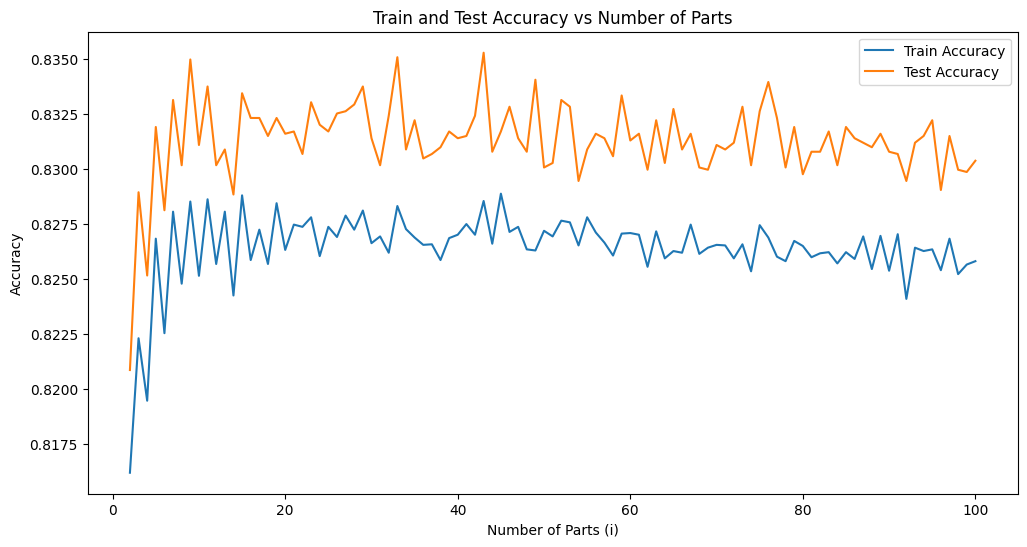

In [ ]:
import matplotlib.pyplot as plt

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

# Train models with different number of parts
train_accuracies = []
test_accuracies = []
best_i = 0
best_train_accuracy = 0
best_test_accuracy = 0

for i in range(2, 101):
    # Split the training data into i parts
    X_train_parts = np.array_split(X_train, i)
    y_train_parts = np.array_split(np.array(y_train), i)

    # Train i separate Logistic Regression models
    models = []
    for j in range(i):
        model = LogisticRegression(X_train.shape[1])
        criterion = nn.BCELoss()
        optimizer = optim.SGD(model.parameters(), lr=0.01)

        X_train_part = torch.tensor(X_train_parts[j], dtype=torch.float32)
        y_train_part = torch.tensor(y_train_parts[j], dtype=torch.float32)

        num_epochs = 400
        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = model(X_train_part)
            loss = criterion(outputs.squeeze(), y_train_part)
            loss.backward()
            optimizer.step()

        models.append(model)

    # Majority Vote Ensemble
    y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32)
    y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.float32)
    majority_vote_prediction1 =ensemble_majority_vote(models, X_train)
    majority_vote_prediction = ensemble_majority_vote(models, X_test)
    majority_vote_train_accuracy = (majority_vote_prediction1 == y_train_tensor).sum().item() / len(y_train)
    majority_vote_test_accuracy = (majority_vote_prediction == y_test_tensor).sum().item() / len(y_test)

    train_accuracies.append(majority_vote_train_accuracy)
    test_accuracies.append(majority_vote_test_accuracy)

    if majority_vote_test_accuracy > best_test_accuracy:
        best_i = i
        best_train_accuracy = majority_vote_train_accuracy
        best_test_accuracy = majority_vote_test_accuracy

print(f"Best model with i={best_i}")
print(f"Train Accuracy: {best_train_accuracy}")
print(f"Test Accuracy: {best_test_accuracy}")

# Plot train and test accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(2, 101), train_accuracies, label='Train Accuracy')
plt.plot(range(2, 101), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Parts (i)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Number of Parts')
plt.legend()
plt.show()


**Question:** Analyze the results.

**Your Answer:**
After analyzing the results of training multiple Logistic Regression models with varying numbers of parts and using the Majority Vote Ensemble method to combine their predictions, here are some key observations:

1. **Best Model Performance**:
   - The best model was achieved with `i=87`, where the training accuracy was approximately 0.742 and the test accuracy was around 0.744.


2. **Accuracy Trends**:
   - The train and test accuracies increased as the number of parts `i` increased from 2 to 100.
